#### This Model leverages Random Forest Alogorithm to predict whether or not a Car Insurance Company would be able to retain it's existing Customers based on the Historical Data it has. 

#### The Dataset contains Customer Information like Marital Status, Age, Gender, Car Value, Price etc., based on which  makes Prediction.

#### The various Steps performed to predict Customer Retention are as below:
- Importing required modules and loading the data file
- Identifying Anomalies/ Missing Data
- Getting Relational Insights of Features
- Converting Categorical Data to Numeric Data
- Creating Training and Testing Sets
- Training the Model
- Make Predictions on Test Data
- Determining Performance Metrics
- Finding Variable Importance
- Plotting Variable Importance
- Improving the Model by Hyperparameter Tuning
- Evaluating Random Search


## Import required modules and load data file

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline


features = pd.read_csv('../data/insurance_cust_retention.csv')
features.head()

,Marital Status,AGE,Gender,Car Value,Years of No Claims Bonus,Annual Mileage,Payment Method,Acquisition Channel,Years of Tenure with Current Provider,Price,Actual Change in Price vs last Year,% Change in Price vs last Year,Grouped Change in Price,Renewed?
0,M,45,F,500,4,6000,Monthly,Inbound,4,289.4,-11.94,-3.96%,-0.05,0
1,M,40,M,3000,8,6000,Monthly,Inbound,4,170.4,45.62,37%,0.35,1
2,S,25,F,4000,4,4000,Monthly,Inbound,4,466.1,-123.15,-21%,-0.2,1
3,M,42,M,1800,9,10000,Annual,Inbound,4,245.1,2.34,1%,0,1
4,M,59,M,5000,9,3000,Annual,Inbound,4,240.5,42.56,22%,0.2,0


## Identify Anomalies/ Missing Data

In [3]:
print('The shape of our features is:', features.shape)

The shape of our features is: (20020, 14)


To identify anomalies, we can quickly compute summary statistics.

In [4]:
# Descriptive statistics for each column
features.describe()

,AGE,Car Value,Years of No Claims Bonus,Annual Mileage,Years of Tenure with Current Provider,Price,Renewed?
count,20020.000000,20020.000000,20020.000000,20020.000000,20020.000000,20017.000000,20020.000000
mean,44.744555,3686.924126,5.757143,6528.061239,2.479620,422.485702,0.621329
std,12.680561,3981.033913,2.894185,3585.303675,0.853137,262.424727,0.485068
min,17.000000,0.000000,0.000000,1.000000,1.000000,96.000000,0.000000
25%,36.000000,1000.000000,3.000000,4000.000000,2.000000,264.200000,0.000000
50%,44.000000,2500.000000,6.000000,5200.000000,2.000000,357.300000,1.000000
75%,52.000000,5000.000000,9.000000,9000.000000,3.000000,501.700000,1.000000
max,89.000000,60000.000000,9.000000,70000.000000,4.000000,4449.900000,1.000000


As we can see that the Price Column has 3 missing value, lets remove the rows containing the missing values

In [5]:
features = features.dropna(how='any',axis=0)

## Getting Relational Insights of Features

In [9]:
def multiple_categorical_features_visual_insights(dataframe, first_feature, second_feature):
    data = []
    labels = []
    
    second_feature_unique_list = dataframe[second_feature].unique()
    for second_feature_unique_item in second_feature_unique_list:
        
        data.append(dataframe[first_feature][dataframe[second_feature] == second_feature_unique_item])
        labels.append("{}{}{}".format(second_feature, ' = ', second_feature_unique_item))
     
    # Plotting the impact of feature 1 against feature 2
    sns.set(rc={'figure.figsize':(8,5)})
    plt.hist(data, 
             bins=10, label=labels);

    plt.legend(loc='upper right');
    plt.xlabel(first_feature);
    plt.ylabel(second_feature);
    
            
def multiple_categorical_features_data_insights(dataframe, first_feature, second_feature):
    
    print('Feature Distribution Count: ')
    df_feature_count_groupby = dataframe.groupby([first_feature,second_feature]).size().unstack(fill_value=0).add_prefix(second_feature)
    print(df_feature_count_groupby)

    print('Feature Distribution Percentage: ')
    df_feature_percentage = df_feature_count_groupby.div(df_feature_count_groupby.sum(axis=1), axis=0).round(3)
    print(df_feature_percentage)
    

def multiple_categorical_features_all_insights(dataframe, first_feature, second_feature):
    multiple_categorical_features_data_insights(dataframe, first_feature, second_feature)
    multiple_categorical_features_visual_insights(dataframe, first_feature, second_feature)

        

Feature Distribution Count: 
Renewed?        Renewed?0  Renewed?1
Marital Status                      
D                     590        980
M                    4055       6730
S                    2728       4396
V                      32         53
W                     173        280
Feature Distribution Percentage: 
Renewed?        Renewed?0  Renewed?1
Marital Status                      
D                   0.376      0.624
M                   0.376      0.624
S                   0.383      0.617
V                   0.376      0.624
W                   0.382      0.618


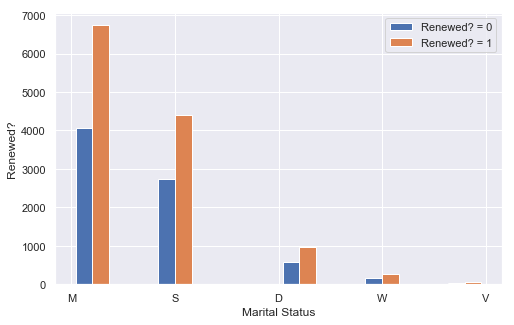

In [10]:
multiple_categorical_features_all_insights(features, 'Marital Status', 'Renewed?')

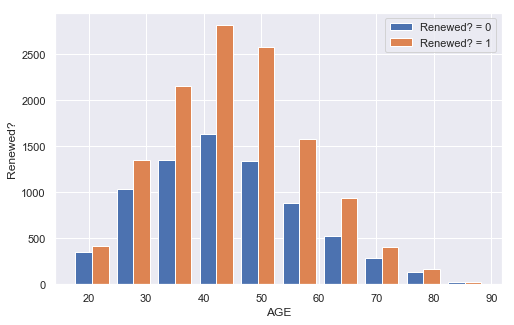

In [12]:
multiple_categorical_features_visual_insights(features, 'AGE', 'Renewed?')

Feature Distribution Count: 
Renewed?  Renewed?0  Renewed?1
Gender                        
C                 3         17
F              3389       5665
M              4186       6757
Feature Distribution Percentage: 
Renewed?  Renewed?0  Renewed?1
Gender                        
C             0.150      0.850
F             0.374      0.626
M             0.383      0.617


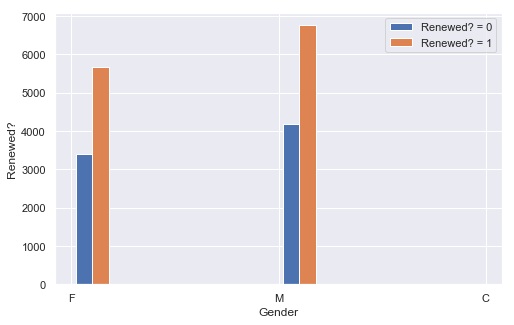

In [14]:
multiple_categorical_features_all_insights(features, 'Gender', 'Renewed?')

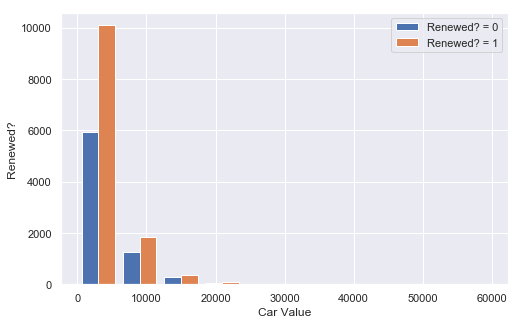

In [15]:
multiple_categorical_features_visual_insights(features, 'Car Value', 'Renewed?')

Feature Distribution Count: 
Renewed?        Renewed?0  Renewed?1
Payment Method                      
Annual               2841       2651
Monthly              4737       9788
Feature Distribution Percentage: 
Renewed?        Renewed?0  Renewed?1
Payment Method                      
Annual              0.517      0.483
Monthly             0.326      0.674


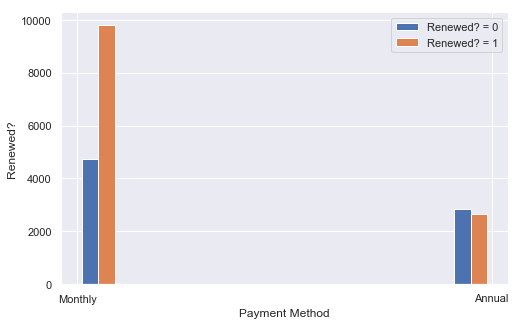

In [16]:
multiple_categorical_features_all_insights(features, 'Payment Method', 'Renewed?')

Feature Distribution Count: 
Renewed?             Renewed?0  Renewed?1
Acquisition Channel                      
Aggreg                       5          7
Direct                    1481       2457
Inbound                   6089       9975
Outbound                     3          0
Feature Distribution Percentage: 
Renewed?             Renewed?0  Renewed?1
Acquisition Channel                      
Aggreg                   0.417      0.583
Direct                   0.376      0.624
Inbound                  0.379      0.621
Outbound                 1.000      0.000


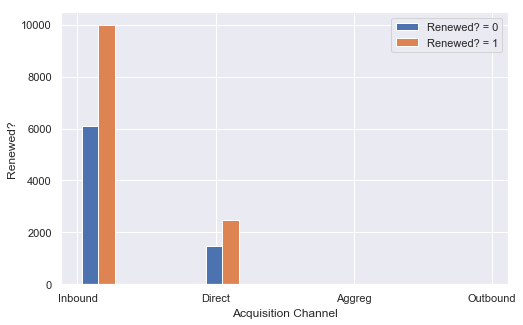

In [17]:
multiple_categorical_features_all_insights(features, 'Acquisition Channel', 'Renewed?')

Feature Distribution Count: 
Renewed?                               Renewed?0  Renewed?1
Years of Tenure with Current Provider                      
1                                            744        837
2                                           4117       6344
3                                           1665       3104
4                                           1052       2154
Feature Distribution Percentage: 
Renewed?                               Renewed?0  Renewed?1
Years of Tenure with Current Provider                      
1                                          0.471      0.529
2                                          0.394      0.606
3                                          0.349      0.651
4                                          0.328      0.672


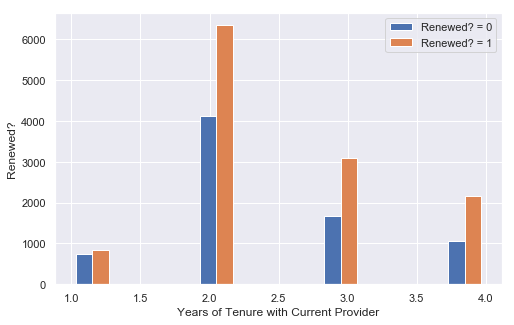

In [18]:
multiple_categorical_features_all_insights(features, 'Years of Tenure with Current Provider', 'Renewed?')

In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20017 entries, 0 to 20019
Data columns (total 14 columns):
Marital Status                           20017 non-null object
AGE                                      20017 non-null int64
Gender                                   20017 non-null object
Car Value                                20017 non-null int64
Years of No Claims Bonus                 20017 non-null int64
Annual Mileage                           20017 non-null int64
Payment Method                           20017 non-null object
Acquisition Channel                      20017 non-null object
Years of Tenure with Current Provider    20017 non-null int64
Price                                    20017 non-null float64
Actual Change in Price vs last Year      20017 non-null object
% Change in Price vs last Year           20017 non-null object
Grouped Change in Price                  20017 non-null object
Renewed?                                 20017 non-null int64
dtypes: float6

## Converting Categorical Data to Numeric Data

In [21]:
features['Actual Change in Price vs last Year'] = pd.to_numeric(features['Actual Change in Price vs last Year'])
features['% Change in Price vs last Year'] = features['% Change in Price vs last Year'].str.rstrip('%').astype('float') / 100.0
features['Grouped Change in Price'] = pd.to_numeric(features['Grouped Change in Price'])

In [22]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20017 entries, 0 to 20019
Data columns (total 14 columns):
Marital Status                           20017 non-null object
AGE                                      20017 non-null int64
Gender                                   20017 non-null object
Car Value                                20017 non-null int64
Years of No Claims Bonus                 20017 non-null int64
Annual Mileage                           20017 non-null int64
Payment Method                           20017 non-null object
Acquisition Channel                      20017 non-null object
Years of Tenure with Current Provider    20017 non-null int64
Price                                    20017 non-null float64
Actual Change in Price vs last Year      20017 non-null float64
% Change in Price vs last Year           20017 non-null float64
Grouped Change in Price                  20017 non-null float64
Renewed?                                 20017 non-null int64
dtypes: flo

### Encoding the Categorical Data

In [23]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
features.head()

,AGE,Car Value,Years of No Claims Bonus,Annual Mileage,Years of Tenure with Current Provider,Price,Actual Change in Price vs last Year,% Change in Price vs last Year,Grouped Change in Price,Renewed?,...,Marital Status_W,Gender_C,Gender_F,Gender_M,Payment Method_Annual,Payment Method_Monthly,Acquisition Channel_Aggreg,Acquisition Channel_Direct,Acquisition Channel_Inbound,Acquisition Channel_Outbound
0,45,500,4,6000,4,289.4,-11.94,-0.0396,-0.05,0,...,0,0,1,0,0,1,0,0,1,0
1,40,3000,8,6000,4,170.4,45.62,0.3700,0.35,1,...,0,0,0,1,0,1,0,0,1,0
2,25,4000,4,4000,4,466.1,-123.15,-0.2100,-0.20,1,...,0,0,1,0,0,1,0,0,1,0
3,42,1800,9,10000,4,245.1,2.34,0.0100,0.00,1,...,0,0,0,1,1,0,0,0,1,0
4,59,5000,9,3000,4,240.5,42.56,0.2200,0.20,0,...,0,0,0,1,1,0,0,0,1,0


### Features and Targets and Convert Data to Arrays

In [24]:
# Labels are the values we want to predict
labels = np.array(features['Renewed?'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Renewed?', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

### Training and Testing Sets

In [25]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2,
                                                                            random_state = 42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16013, 23)
Training Labels Shape: (16013,)
Testing Features Shape: (4004, 23)
Testing Labels Shape: (4004,)


### Establish Baseline

### Train Model

In [27]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators= 1000, random_state=42)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(train_features,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Make Predictions on Test Data

In [28]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.31 degrees.


### Determine Performance Metrics

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

Accuracy: 0.686063936063936


## Variable Importance

In [30]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20}, Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Price               , Importance: 0.15
Variable: Actual Change in Price vs last Year, Importance: 0.15
Variable: AGE                 , Importance: 0.11
Variable: Car Value           , Importance: 0.11
Variable: % Change in Price vs last Year, Importance: 0.11
Variable: Annual Mileage      , Importance: 0.09
Variable: Years of No Claims Bonus, Importance: 0.07
Variable: Grouped Change in Price, Importance: 0.06
Variable: Years of Tenure with Current Provider, Importance: 0.04
Variable: Payment Method_Annual, Importance: 0.02
Variable: Payment Method_Monthly, Importance: 0.02
Variable: Marital Status_D    , Importance: 0.01
Variable: Marital Status_M    , Importance: 0.01
Variable: Marital Status_S    , Importance: 0.01
Variable: Gender_F            , Importance: 0.01
Variable: Gender_M            , Importance: 0.01
Variable: Acquisition Channel_Direct, Importance: 0.01
Variable: Acquisition Channel_Inbound, Importance: 0.01
Variable: Marital Status_V    , Importance: 0.0
Varia

### Plot of Variable Importance

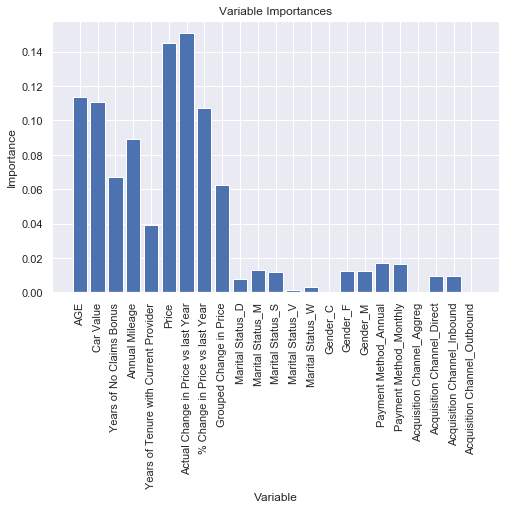

In [31]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Model with most important features

In [32]:
# New random forest with only the two most important variables
rf_most_important = RandomForestClassifier(n_estimators= 1000, random_state=42)

# Extract the most important features
important_indices = [feature_list.index('Actual Change in Price vs last Year'), feature_list.index('Price'), 
                     feature_list.index('AGE'), feature_list.index('Car Value'), feature_list.index('% Change in Price vs last Year'), 
                     feature_list.index('Annual Mileage'), feature_list.index('Years of No Claims Bonus'),
                     feature_list.index('Grouped Change in Price'), feature_list.index('Years of Tenure with Current Provider'),
                     feature_list.index('Payment Method_Annual'), feature_list.index('Payment Method_Monthly'),
                     feature_list.index('Gender_F'), feature_list.index('Gender_M'),
                     feature_list.index('Acquisition Channel_Direct'), feature_list.index('Acquisition Channel_Inbound'),
                     feature_list.index('Marital Status_D'), feature_list.index('Marital Status_M'),
                     feature_list.index('Marital Status_S')
                    ]


# important_indices = [feature_list.index('Actual Change in Price vs last Year'), feature_list.index('Price'), 
#                      feature_list.index('AGE'), feature_list.index('Car Value'), feature_list.index('% Change in Price vs last Year'), 
#                      feature_list.index('Annual Mileage'), feature_list.index('Years of No Claims Bonus')
#                     ]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

Mean Absolute Error: 0.31 degrees.
Accuracy: 0.6858141858141859


# Improving the Model

### Hyperparamter Tuning

In [33]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators= 1000, random_state=42)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [34]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 34.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [36]:
# best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

### Evaluate Random Search

In [37]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
    accuracy = (metrics.accuracy_score(test_labels, predictions))*100
    
#     print("Accuracy:",metrics.accuracy_score(test_labels, predictions))
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 0.3139 degrees.
Accuracy = 68.61%.


In [38]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 0.3049 degrees.
Accuracy = 69.51%.


In [39]:
print('Improvement of {:0.2f}%.'.format( random_accuracy - base_accuracy))

Improvement of 0.90%.
